In [1]:
# Desccription: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#               to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [2]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-02-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540044
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607438
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747403
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880665
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860230
...,...,...,...,...,...,...
2022-01-26,164.389999,157.820007,163.500000,159.690002,108275300.0,159.031921
2022-01-27,163.839996,158.279999,162.449997,159.220001,121954600.0,158.563873
2022-01-28,170.350006,162.800003,165.710007,170.330002,179935700.0,169.628067


In [4]:
# Get the number of rows ans columns in the data set
df.shape

(2538, 6)

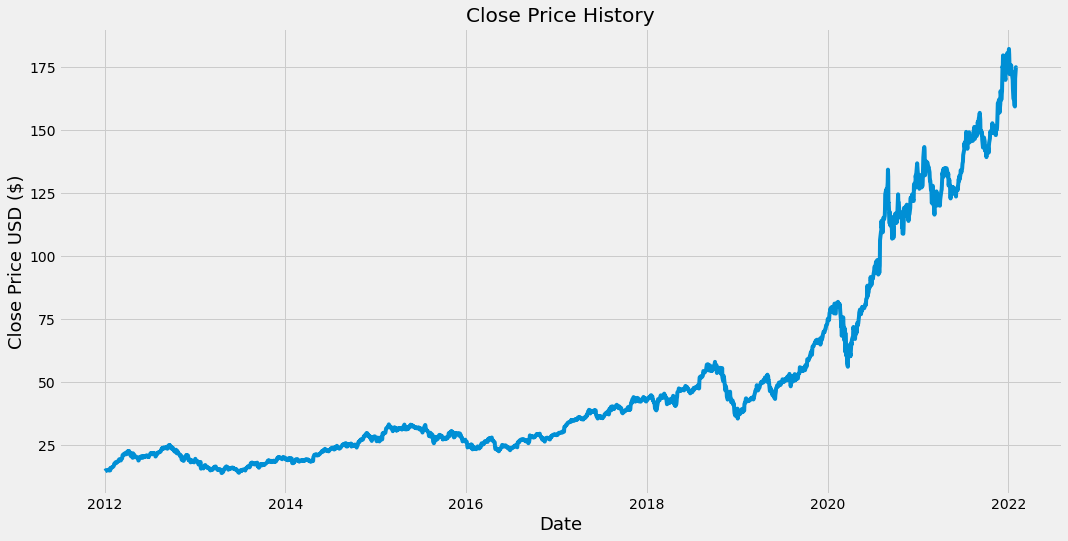

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [6]:
# Create a new dataframe with only the 'Close column'
data =df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2031

In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) # 將歸一化的結果逆轉

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.93050209],
       [0.95698031],
       [0.9559688 ]])

In [8]:
# Create the training data set
# Create the scaled trainging data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [9]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1971, 60, 1)

In [11]:
# Build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
# Train the model
model.fit(x_train, y_train, batch_size = 20, epochs = 10)

Epoch 1/10
99/99 [==============================] - 5s 26ms/step - loss: 8.0659e-04
Epoch 2/10
99/99 [==============================] - 3s 27ms/step - loss: 6.8538e-05
Epoch 3/10
99/99 [==============================] - 3s 26ms/step - loss: 6.6854e-05
Epoch 4/10
99/99 [==============================] - 3s 28ms/step - loss: 7.0392e-05
Epoch 5/10
99/99 [==============================] - 3s 26ms/step - loss: 7.1135e-05
Epoch 6/10
99/99 [==============================] - 3s 28ms/step - loss: 5.0247e-05
Epoch 7/10
99/99 [==============================] - 3s 30ms/step - loss: 4.8699e-05
Epoch 8/10
99/99 [==============================] - 3s 29ms/step - loss: 4.6806e-05
Epoch 9/10
99/99 [==============================] - 3s 29ms/step - loss: 4.3499e-05
Epoch 10/10
99/99 [==============================] - 3s 26ms/step - loss: 4.6708e-05


In [14]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [15]:
# Convert the data to numpy array
x_test = np.array(x_test)

In [16]:
# Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 9ms/step


In [18]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test ) ** 2 )
rmse

1.1765704484145787

<ipython-input-19-5da224783d56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


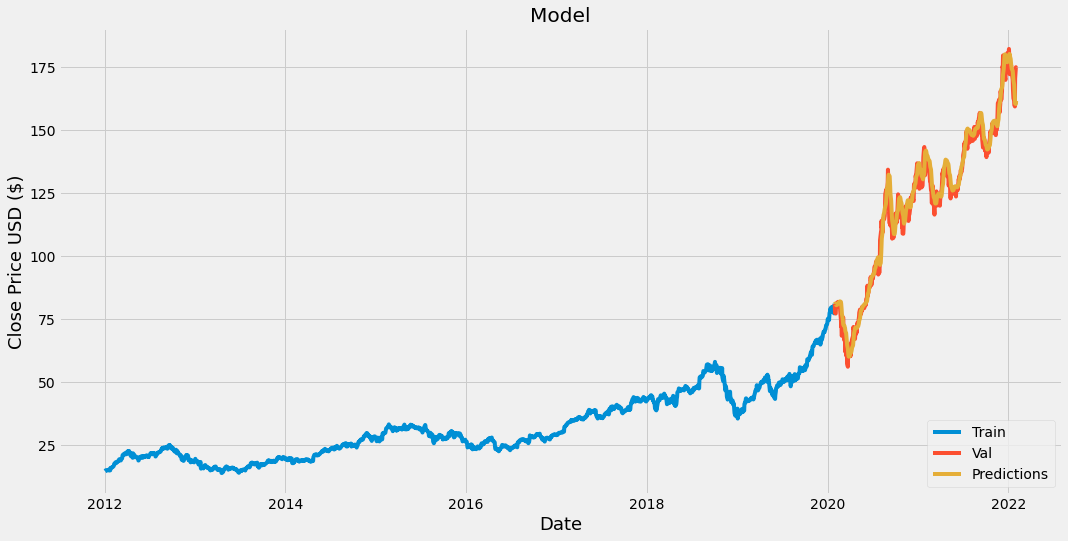

In [19]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [20]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-01-30,80.967499,80.914810
2020-01-31,77.377502,81.085732
2020-02-03,77.165001,80.980759
2020-02-04,79.712502,80.684860
2020-02-05,80.362503,80.501587
...,...,...
2022-01-26,159.690002,163.898804
2022-01-27,159.220001,162.022980
2022-01-28,170.330002,160.369553
